# Warehouse Optimization

##### A Business is deﬁned as an integration or enterprise occupying commercial or professional exercises. Consumer and the producer share a give and take relationship. Producers business can be small, medium and large scale depending upon the targeted consumers. For the small and medium scale business, consumer requirements are easily met, and customer satisfaction is maintained. The large-scale business however targets a larger audience and it turns out to be diﬃcult to manage the requirements of a variety of consumers. To meet the requirements, the producer needs a good infrastructure in place for customers. The warehouse plays an important role as it stores all the elements to be delivered to consumers, be it a B2B or B2C entity. To maintain the wear and tear of warehouse, the warehouse manager must invest a large amount of resources to keep business running. This plan of action speaks about the automation of warehouse activities, so that the optimization of warehouse is achieved; and with the help of data science principles the maintenance of warehouse is carried on, which brings about smoothness in warehouse governance. To meet this objective, data science models will be used to identify the patterns from the dataset and the resultant will then be used as an input to the pricing mechanisms, which will keep the wearing-out products from the warehouse at bay

## Initilization

In [54]:
import pandas as pd
import numpy as np
data = pd.read_csv('ML_1-6.csv')
data.dtypes

1 Manufacturer No                  object
1-J-Price                         float64
1-J-QTY                           float64
Stock sold date 1                 float64
2                                 float64
                                   ...   
Average % Change/stock             object
Manufacturer No                    object
Average sale qty                   object
Sale rate                          object
New sale rate (from new sheet)    float64
Length: 365, dtype: object

## Exploratory Analysis

In [55]:
# get some basic ideas about the data
def summerize_data(df, columns):
    for column in columns:
        print(column)
        if df.dtypes[column] == np.object: # Categorical data
            print(df[column].value_counts())
        else:
            print(df[column].describe())
            
        print('\n')
    
columns = ["Price(USD)", "Inventory", "In Stock", "weight(lb)", "SaleRate"]
summerize_data(train, columns)

Price(USD)
count    4496.000000
mean      272.907547
std       592.651982
min         0.210000
25%        26.650000
50%        81.740000
75%       231.140000
max      7021.250000
Name: Price(USD), dtype: float64


Inventory
count    4496.000000
mean       57.491770
std       114.854261
min         1.000000
25%         5.000000
50%        21.000000
75%        52.000000
max      1002.000000
Name: Inventory, dtype: float64


In Stock
Y    3330
L     870
Name: In Stock, dtype: int64


weight(lb)
count    4198.000000
mean        6.475088
std        13.761894
min         0.000000
25%         0.350000
50%         1.545000
75%         5.490000
max       174.000000
Name: weight(lb), dtype: float64


SaleRate
count    8400.000000
mean        0.638946
std         0.273979
min         0.000000
25%         0.471910
50%         0.747191
75%         0.839462
max         0.981273
Name: SaleRate, dtype: float64




## Graphs

In [60]:
import matplotlib.pyplot as plt
from scipy.stats import norm
# if using a Jupyter notebook, inlcude:
%matplotlib inline

In [59]:
data["SaleRate"].plot.kde(bw_method=0.3)

KeyError: 'SaleRate'

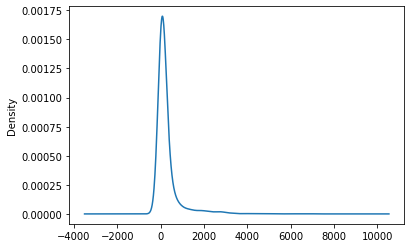

In [46]:
data["Price(USD)"].plot.kde(bw_method=0.3)

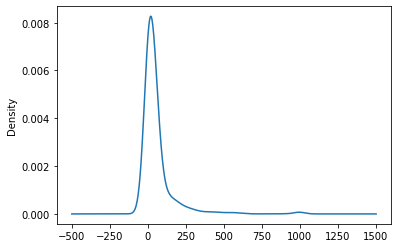

In [47]:
data["Inventory"].plot.kde(bw_method=0.3)

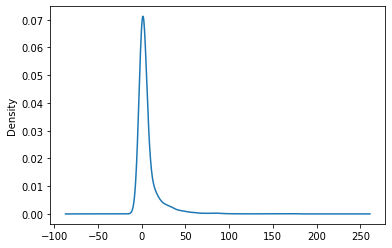

In [48]:
data[ "weight(lb)"].plot.kde(bw_method=0.3)

# kde + hist

In [ ]:
g = df.groupby('Name').Zscore
n = g.ngroups
fig, axes = plt.subplots(n // 2, 2, figsize=(6, 6), sharex=True, sharey=True)
for i, (name, group) in enumerate(g):
    r, c = i // 2, i % 2
    a1 = axes[r, c]
    a2 = a1.twinx()
    group.plot.hist(ax=a2, alpha=.3)
    group.plot.kde(title=name, ax=a1, c='r')
fig.tight_layout()

# corelation matrix

In [61]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

NameError: name 'df_train' is not defined

# Relationship with categorical values

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [8]:
data = train.join(test.set_index('Manufacturer No'), on='Manufacturer No')
data

,List No,Item No,UPC Code,Manufacturer No,Manufacturer,Category,Category Path,Product Name,Price(USD),Inventory,...,86,86.1,87,87.1,88,88.1,89,89.1,90,90.1
0,2661.0,CA-THEMISK,8.500000e+11,0R100010,RAIJINTEK,LGA 2011,:Component:Fan & Heatsink:CPU Fan & Heatsink:S...,RAIJINTEK THEMIS BLACK 120mm CPU Cooler for In...,17.94,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1346.0,TP-POE10R,8.460000e+11,TL-POE10R,TP-Link,Power Over Ethernet (POE),:Component:Networking:Power Over Ethernet (POE):,TP-Link TL-POE10R Power Over Ethernet Splitter,16.40,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1591.0,KB-110XPS2,9.116324e+10,31300710100,Genius,Keyboard,:Component:Input & Output Device:Keyboard:,Genius KB-110X Wired PS/2 Desktop Keyboard,8.20,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1360.0,NT-ST3124P,8.859120e+10,ST3124P,Netis,Unmanaged 10/100 Switch,:Component:Networking:Wired Networking:Unmanag...,netis ST3124P 24-Port Fast Ethernet Switch,26.65,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1457.0,ST-C5_1GR,8.780000e+11,C5M-1-GYB,iMicro,Ethernet Cable,:Component:Cable:Cat5 Cable:,iMicro UTP-4P5E-1GREY 1ft CAT5e Cable (Grey),1.33,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data = pd.merge(train, test, on='Manufacturer No', how='inner')
data

,List No,Item No,UPC Code,Manufacturer No,Manufacturer,Category,Category Path,Product Name,Price(USD),Inventory,...,86,86.1,87,87.1,88,88.1,89,89.1,90,90.1
0,1596.0,KB-US9813,8.410000e+11,KB-US9813,iMicro,Keyboard,:Component:Input & Output Device:Keyboard:,iMicro KB-US9813 104-Key Wired USB Keyboard (E...,9.23,1002.0,...,9.23,NaN,9.23,NaN,9.23,NaN,9.23,NaN,9.23,NaN
1,95.0,W1333SA4GM,NaN,W1333SA4GM(SZ),SUPER TALENT,DDR3 1333,:Component:DRAM Memory:Notebook DRAM:DDR3 (204...,Super Talent DDR3-1333 SODIMM 4GB/512Mx64 CL9 ...,38.95,17.0,...,38.95,0.0,38.95,0.0,38.95,0.0,38.95,0.0,38.95,0.0
2,1287.0,AS-USBN13,6.110000e+11,USB-N13_B1,ASUS,Wireless Network Adapter,:Component:Networking:Wireless Networking:Wire...,Asus USB-N13 Wireless-N USB Adapter,20.50,51.0,...,20.50,0.0,20.50,0.0,20.50,0.0,20.50,0.0,20.50,0.0
3,2770.0,PS-ADPT65W,8.780000e+11,PS-ADPT65W,iMicro,Battery & Charger,:PC & Laptop:Accessory:Battery & Charger:,iMicro 65W Universal Notebook Adapter(Black),19.47,51.0,...,19.47,0.0,19.47,0.0,19.47,0.0,19.47,0.0,19.47,0.0
4,2667.0,CA-AGOS-K,8.500000e+11,0R200001,RAIJINTEK,ATX Mid Tower,:Component:Case:Computer Case:ATX Mid Tower:,RAIJINTEK AGOS No Power Supply ATX Mid Tower (...,46.12,4.0,...,46.12,0.0,46.12,0.0,46.12,0.0,46.12,0.0,46.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,1274.0,PNY-P5000,7.510000e+11,VCQP5000-PB,PNY,Nvidia,:Component:Video Card:PCI Express Video Card:N...,PNY NVIDIA Quadro P5000 16GB GDDR5 DVI/4Displa...,1835.26,6.0,...,1835.26,0.0,1835.26,0.0,1835.26,0.0,1835.26,0.0,1835.26,0.0
3815,739.0,GB-A15XAF7,8.140000e+11,AERO 15 CLASSIC-XA-F74ADP,GIGABYTE,Laptop & Notebook,:PC & Laptop:Laptop/Notebook:,Gigabyte AERO 15 Classic-XA-F74ADP 15.6 inch I...,2321.63,2.0,...,2321.63,0.0,2321.63,0.0,2321.63,0.0,2321.63,0.0,2321.63,0.0
3816,4043.0,CA-847E2C8,6.720000e+11,CSE-847E2C-R1K28JBOD,Supermicro,JBOD / RAID Storage,:Hardware & Software:Server & Workstation:Stor...,Supermicro SuperChassis CSE-847E2C-R1K28JBOD 1...,2718.30,17.0,...,2718.30,0.0,2718.30,0.0,2718.30,0.0,2718.30,0.0,2718.30,0.0
3817,1823.0,NEC-E805,8.060000e+11,E805,NEC Display Solutions,"32""/above LCD/LED Monitor",:Component:Monitor & Display & TV:LCD/LED Moni...,"NEC E805 80 inch Large Screen 5,000:1 4ms Comp...",4407.50,3.0,...,4407.50,0.0,4407.50,0.0,4407.50,0.0,4407.50,0.0,4407.50,0.0


In [ ]:
#X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
import sys
!conda install --yes --prefix {sys.prefix} keras

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.8.0              |           py37_0         164 KB
    astor-0.8.0                |           py37_0          47 KB
    gast-0.2.2                 |           py37_0         155 KB
    google-pasta-0.1.7         |             py_0          41 KB
    grpcio-1.16.1              |   py37h351948d_1         850 KB
    keras-2.2.4                |                0           5 KB
    keras-applications-1.0.8   |             py_0          33 KB
    keras-base-2.2.4           |           py37_0         416 KB
    keras-preprocessing-1.1.0  |             py_1          36 KB
    libmklml-2019.0.5          |                0       


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3


